# A. Final Project 2 kelompok 3
---
### Anggota kelompok : <br>
<ol>
<li>Alif Faqiih             PYTN-KS12-024</li>
<li>Syarif Khoirul Al Fian  PYTN-KS12-009</li>
<li>Marcel Afandi           PYTN-KS12-018</li>
<ol>


# B. Library yang digunakan

In [65]:
# For Load Data
import pandas as pd
import numpy as np

# For Visualizing Data
import matplotlib.pyplot as plt
import seaborn as sns

# For Prepocessing Data 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.datasets import make_classification


# Classification Model 
from sklearn.linear_model import LogisticRegression
# 1. Decision Tree Clasification 
from sklearn.tree import DecisionTreeClassifier
# 2. Random Forest Classifitaion 
from sklearn.ensemble import RandomForestClassifier
# 3. Naive Bayes Classification 
from sklearn.naive_bayes import GaussianNB
# 4. KNN 
from sklearn.neighbors import KNeighborsRegressor

# For Evaluation Model 
from sklearn.metrics import plot_roc_curve, classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# C. Data Loading

In [2]:
data = pd.read_csv('data\heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
data.shape

(299, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# D. Data Cleaning

In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Kita bisa melihat semua data dan tidak ada Missing Value

In [8]:
data.rename(columns={'age':'Usia',
                     'anaemia':'anemia',
                     'high_blood_pressure':'hipertensi',
                     'sex':'Gender',
                     'smoking':'Perokok',
                     'DEATH_EVENT':'Kematian'
                    }, inplace=True)

In [9]:
for col in data.columns:
    print(col, ': ')
    print(data[col].unique())
    print('\n','#'*60,'\n')

Usia : 
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]

 ############################################################ 

anemia : 
[0 1]

 ############################################################ 

creatinine_phosphokinase : 
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  24

Berdasarkan pengecekan diatas, tidak ada data invalid pada setiap atribut dataset

 # E. Explorating Data

## 1. Data Query

In [10]:
df_EDA = data.copy()
df_EDA

,Usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,Gender,Perokok,time,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
df_EDA.describe()

,Usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,Gender,Perokok,time,Kematian
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
df_EDA["Gender"] = np.where(df_EDA["Gender"] < 1, "Female", "Male")

In [13]:
for col in df_EDA.columns:
    print(format(col),df_EDA[col].unique())

Usia [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anemia [0 1]
creatinine_phosphokinase [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442 

In [14]:
categoricals=['anemia','diabetes','hipertensi','Perokok', 'Kematian']
change = {0:"No", 1:"Yes"}
for col in categoricals :
    for i in range(299):
        df_EDA.loc[i,col]=change[df_EDA.loc[i,col]]
for col in df_EDA.columns:
    print(format(col),df_EDA[col].unique())

Usia [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anemia ['No' 'Yes']
creatinine_phosphokinase [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 233

In [15]:
# Melihat statistika deskriptif dari data menggunakan fungsi describe()
df_EDA.astype('category').describe()

,Usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,Gender,Perokok,time,Kematian
count,299.0,299,299,299,299,299,299.00,299.0,299,299,299,299,299
unique,47.0,2,208,2,17,2,176.00,40.0,27,2,2,148,2
top,60.0,No,582,No,35,No,263358.03,1.0,136,Male,No,250,No
freq,33.0,170,47,174,49,194,25.00,50.0,40,194,203,7,203


## 2. Visualisasi Data

In [16]:
# Mengatur Label, order dan color
labels=['Female', 'Male']
order=data['Gender'].value_counts().index
color = ('#365c8d', '#1fa187')

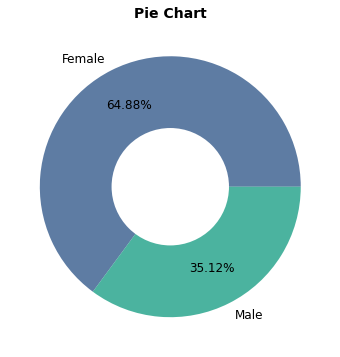

In [59]:
# --- Pie Chart ---
plt.figure(figsize=(10, 6))
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
plt.pie(df_EDA['Gender'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12}, colors = color)
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

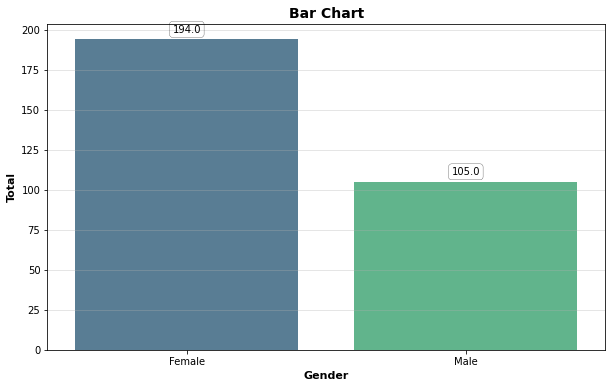

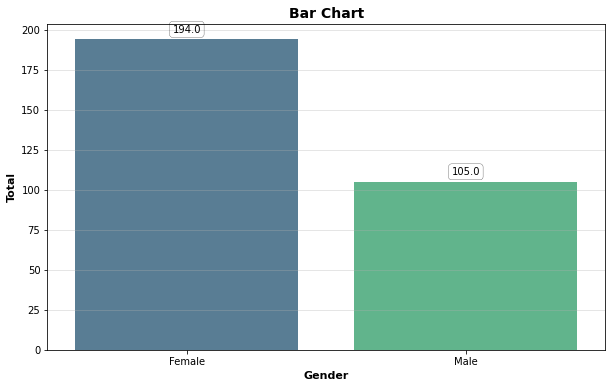

In [61]:
# --- Bar Chart ---
countplt = plt.figure(figsize=(10, 6))
plt.title('Bar Chart', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
ax = sns.countplot(x='Gender', data=data, order=order,
                   alpha=0.85, palette = 'viridis')
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
          )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

Dari pie dan bar chart diatas kita dapat melihat gender distribution pada dataset ini.
Didapatkan jumlah Gender Male yaitu 105 atau 35.12%, sedangkan jumlah Gender Wanita yaitu 194 atau 64.88%.
Jika dihitung maka jumlah wanita lebih banyak dari pada pria. 

In [22]:
# Melihat jumlah penderita anemia
anemia=len(data[data['anemia']==1])
tidak_anemia=len(data[data['anemia']==0])

# Melihat jumlah penderita diabetes
diabetes=len(data[data['diabetes']==1])
tidak_diabetes=len(data[data['diabetes']==0])

# Melihat jumlah penderita hipertensi
hipertensi=len(data[data['hipertensi']==1])
tidak_hipertensi=len(data[data['hipertensi']==0])

# Membuat dataframe dari jumlah penderita diabetes, anemia, dan hipertensi
data_ADH=pd.DataFrame(
    {'keterangan':['anemia','diabetes','hipertensi'],
     'no':[tidak_anemia,tidak_diabetes,tidak_hipertensi],
    'yes':[anemia,diabetes,hipertensi],
    })
data_ADH=data_ADH.set_index('keterangan')
data_ADH

,no,yes
keterangan,,
anemia,170,129
diabetes,174,125
hipertensi,194,105


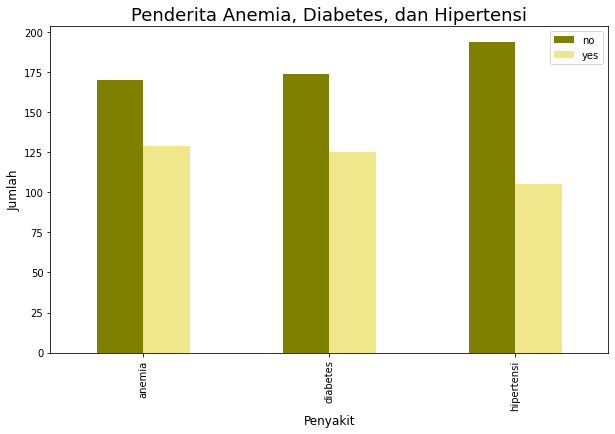

In [24]:
# Membuat visualisasi jumlah penderita anemia, diabetes, hipertensi
data_ADH.plot(kind='bar', figsize=(10,6),
                  color=['olive','khaki'])
plt.title('Penderita Anemia, Diabetes, dan Hipertensi', fontsize=18)
plt.xlabel('Penyakit', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

Dilihat dari plot diketahui bahwa hampir 50% pasien penyakit jantung memiliki riwayat penyakit anemia, diikuti diabetes dan hipertensi.

# F. Preprocessing

## 1. Correlation

<AxesSubplot:>

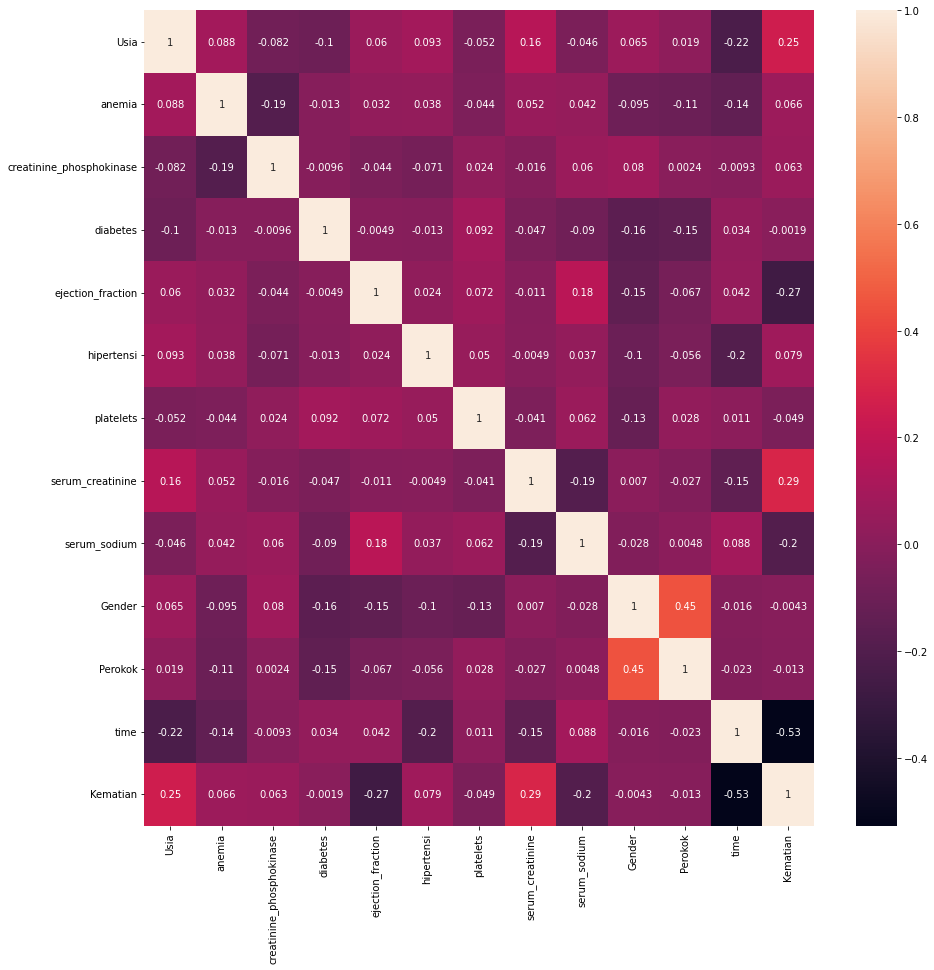

In [26]:
#melihat korelasi antar fitur
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

In [62]:
data.head()

,Usia,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,hipertensi,platelets,serum_creatinine,serum_sodium,Gender,Perokok,time,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [63]:
Features = ['time','ejection_fraction','serum_creatinine']
x = data[Features]
y = data["Kematian"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [64]:
accuracy_list = []

## 1. Logistic Regression

In [66]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [67]:
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  90.00%


In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix

<Figure size 432x288 with 0 Axes>

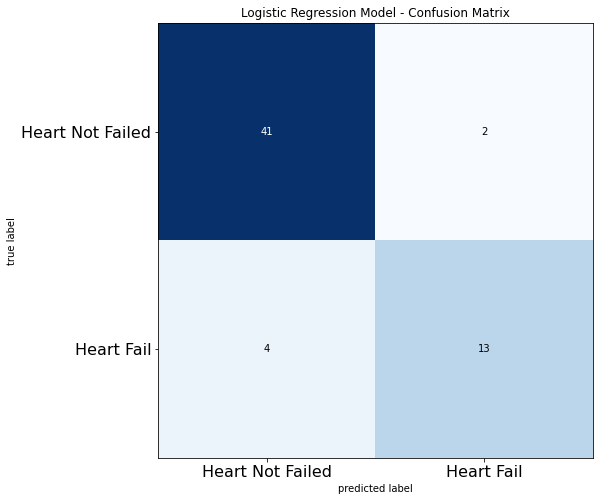

In [73]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

## 2. Support Vector Machine

In [75]:
from sklearn.svm import SVC

In [76]:
# svc

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [77]:
print("Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  90.00%


<Figure size 432x288 with 0 Axes>

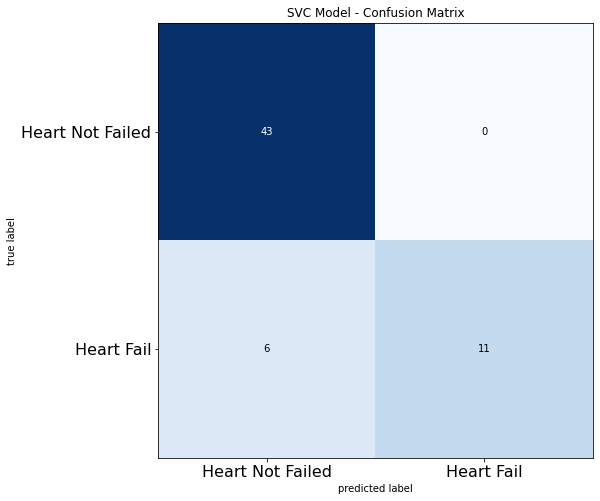

In [78]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

## 3. K Neighbors Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [81]:
print("Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  91.67%


<Figure size 432x288 with 0 Axes>

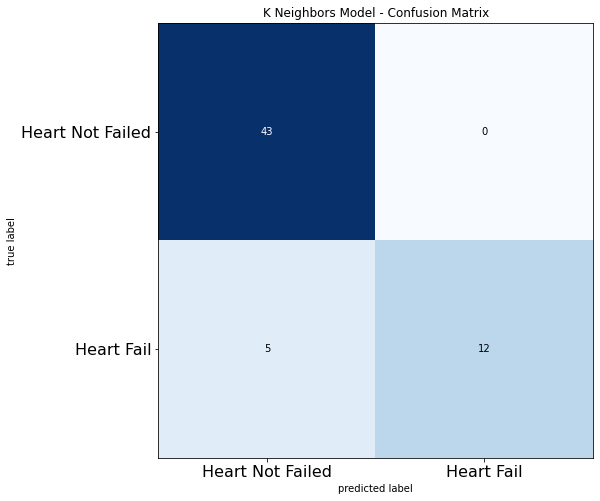

In [82]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

## 4.Decision Tree Classifier 

In [83]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [84]:
print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  90.00%


<Figure size 432x288 with 0 Axes>

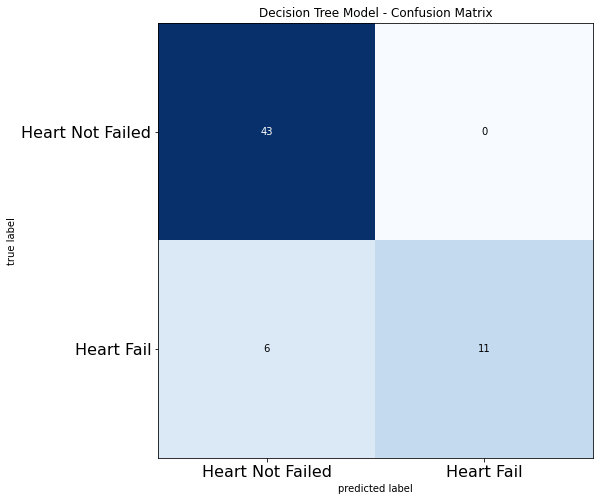

In [85]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

## 5. RandomForestClassifier

In [86]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [87]:
print("Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  90.00%


<Figure size 432x288 with 0 Axes>

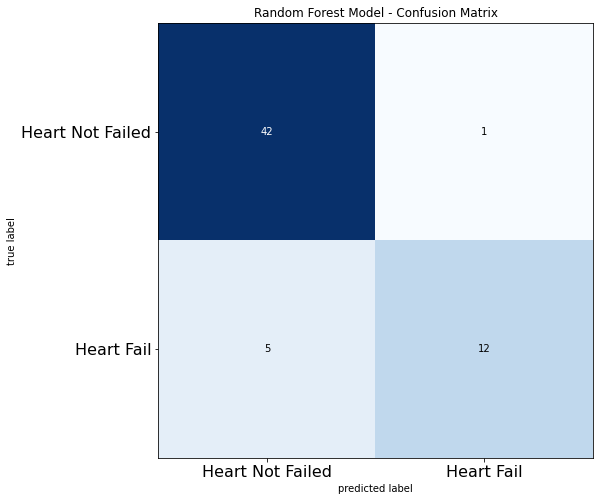

In [88]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [ ]:
# xgbrf classifier

xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)